In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [347]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [348]:
def mymodel():
    print('1 LogisticRegression')
    print('2 SVC')
    print('3 DecisionTreeClassifier')
    print('4 KNeighborsClassifier')
    print('5 RandomForestClassifier')
    print('6 GaussianNB')
    

In [349]:
df = pd.read_csv('drug200.csv')
df.shape

(200, 6)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.3+ KB


In [351]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [352]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [353]:
df.duplicated().sum()

0

In [354]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<AxesSubplot:xlabel='Na_to_K'>

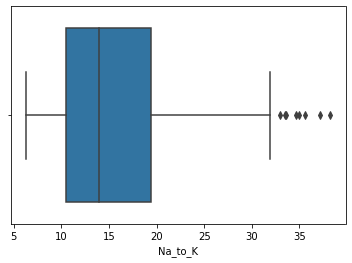

In [355]:
sns.boxplot(df['Na_to_K'])

In [356]:
# we have outlier
# will check for distribution

<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

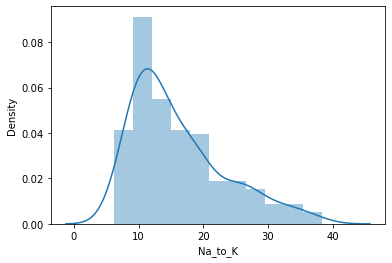

In [357]:
sns.distplot(df['Na_to_K'])

In [358]:
# it is skewed so we will use IQR method to find outliers

In [359]:
mean = df['Na_to_K'].mean()
q1 = df['Na_to_K'].quantile(0.25)
q3 = df['Na_to_K'].quantile(0.75)

IQR = q3-q1

upper_limit = mean + (1.5*IQR)
lower_limit = mean - (1.5*IQR)

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

df[df['Na_to_K']>upper_limit]

upper limit  29.486234999999986
lower limit  2.682734999999994


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
22,47,M,LOW,NORMAL,30.568,drugY
24,33,F,LOW,HIGH,33.486,drugY
26,31,M,HIGH,HIGH,30.366,drugY
33,65,F,HIGH,NORMAL,31.876,drugY
48,23,M,NORMAL,HIGH,31.686,drugY
60,38,F,LOW,NORMAL,29.875,drugY
96,58,F,LOW,HIGH,38.247,drugY
98,20,M,HIGH,NORMAL,35.639,drugY
128,47,M,LOW,NORMAL,33.542,drugY
131,52,M,LOW,NORMAL,32.922,drugY


In [360]:
df[df['Na_to_K']<lower_limit]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


## EDA

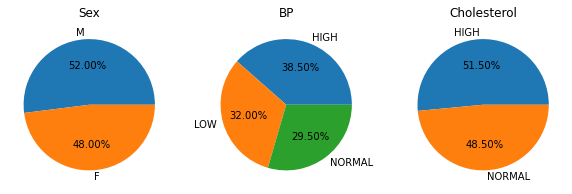

In [361]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
vc = df['Sex'].value_counts()
plt.pie(x=vc.values,labels=vc.index,autopct='%.2f%%')
plt.title('Sex')

plt.subplot(1,3,2)
vc = df['BP'].value_counts()
plt.pie(x=vc.values,labels=vc.index,autopct='%.2f%%')
plt.title('BP')

plt.subplot(1,3,3)
vc = df['Cholesterol'].value_counts()
plt.pie(x=vc.values,labels=vc.index,autopct='%.2f%%')
plt.title('Cholesterol')

plt.show()

Text(0.5, 1.0, 'Drug')

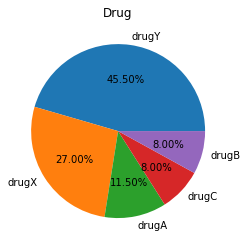

In [362]:
vc = df['Drug'].value_counts()
plt.pie(x=vc.values,labels=vc.index,autopct='%.2f%%')
plt.title('Drug')

### 1. Age Columns

<AxesSubplot:xlabel='Age', ylabel='Density'>

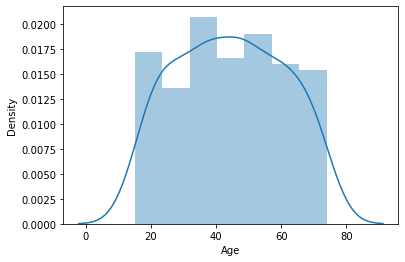

In [363]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

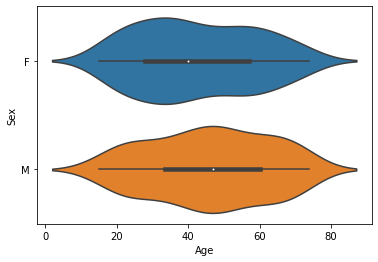

In [364]:
sns.violinplot(df['Age'],y=df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='BP'>

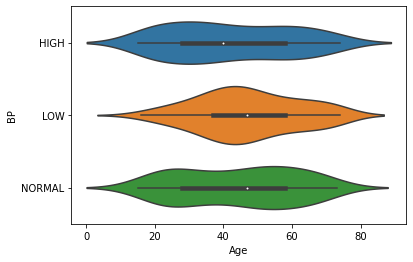

In [365]:
sns.violinplot(df['Age'],y=df['BP'])

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

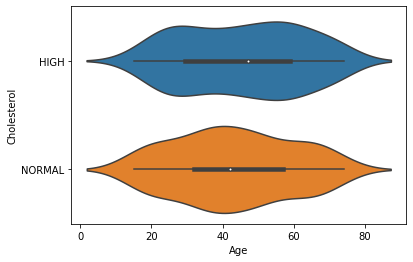

In [366]:
sns.violinplot(df['Age'],y=df['Cholesterol'])

<AxesSubplot:xlabel='Drug', ylabel='Age'>

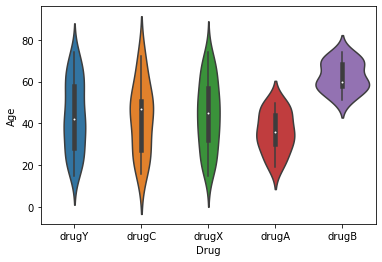

In [367]:
sns.violinplot(y=df['Age'],x=df['Drug'])

### 2 Sex Columns

<AxesSubplot:xlabel='Sex', ylabel='count'>

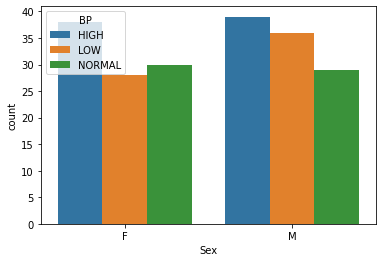

In [368]:
sns.countplot(df['Sex'],hue=df['BP'])

In [369]:
len(df[(df['BP']=='HIGH') & (df['Sex']=='F')])

38

<AxesSubplot:xlabel='Sex', ylabel='count'>

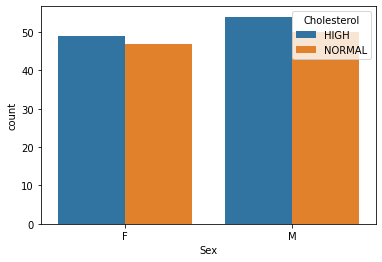

In [370]:
sns.countplot(df['Sex'],hue=df['Cholesterol'])

<AxesSubplot:xlabel='Na_to_K', ylabel='Sex'>

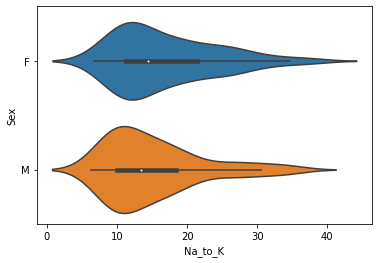

In [371]:
sns.violinplot(y=df['Sex'],x=df['Na_to_K'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

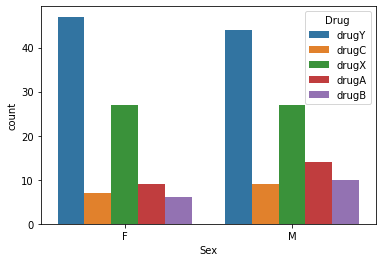

In [372]:
sns.countplot(df['Sex'],hue=df['Drug'])

### 3 BP Column

<AxesSubplot:xlabel='BP', ylabel='count'>

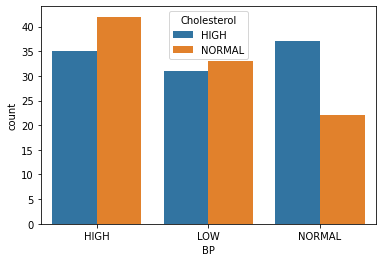

In [373]:
sns.countplot(df['BP'],hue=df["Cholesterol"])

<AxesSubplot:xlabel='Na_to_K', ylabel='BP'>

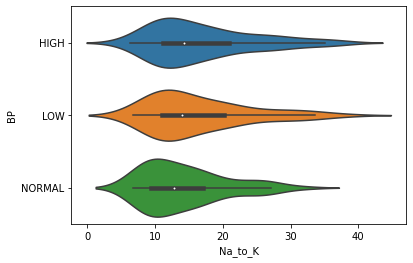

In [374]:
sns.violinplot(y=df['BP'],x=df["Na_to_K"])

<AxesSubplot:xlabel='BP', ylabel='count'>

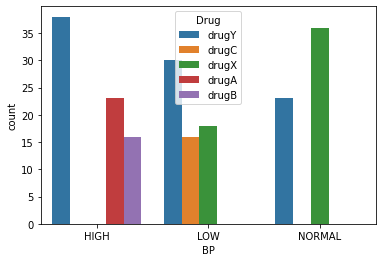

In [375]:
sns.countplot(df['BP'],hue=df["Drug"])

### 4 Cholesterol Column

<AxesSubplot:xlabel='Na_to_K', ylabel='Cholesterol'>

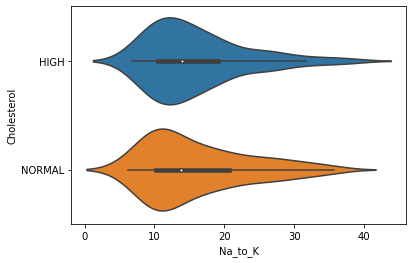

In [376]:
sns.violinplot(y=df['Cholesterol'],x=df['Na_to_K'])

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

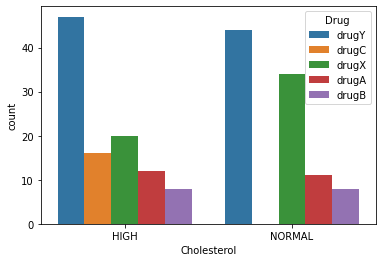

In [377]:
sns.countplot(df['Cholesterol'],hue=df['Drug'])

In [378]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### 5 Na_to_K column

<AxesSubplot:xlabel='Na_to_K', ylabel='Drug'>

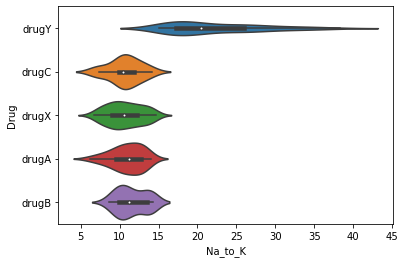

In [379]:
sns.violinplot(x=df['Na_to_K'],y=df['Drug'])

## Correlation

In [380]:
corr = df.corr()
corr

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


## Preprocessing

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.3+ KB


In [382]:
catlist = df.select_dtypes(exclude=['int64','float64']).columns
catlist

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [383]:
for col in catlist:
    print(col, df[col].nunique())

Sex 2
BP 3
Cholesterol 2
Drug 5


In [384]:
for col in catlist:
    print(col, df[col].unique())

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [385]:
sex_cat = pd.get_dummies(df['Sex'])
df_new = pd.concat((df,sex_cat),axis=1)
df_new

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,F,HIGH,HIGH,25.355,drugY,1,0
1,47,M,LOW,HIGH,13.093,drugC,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,0
4,61,F,LOW,HIGH,18.043,drugY,1,0
...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0
196,16,M,LOW,HIGH,12.006,drugC,0,1
197,52,M,NORMAL,HIGH,9.894,drugX,0,1
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1


In [386]:
df_new = df_new.drop(['Sex'],axis=1)
df_new

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,1,0
196,16,LOW,HIGH,12.006,drugC,0,1
197,52,NORMAL,HIGH,9.894,drugX,0,1
198,23,NORMAL,NORMAL,14.020,drugX,0,1


In [387]:
catlist = list(df_new.select_dtypes(include=['object']).columns)
catlist

['BP', 'Cholesterol', 'Drug']

In [388]:
catlist.remove('Drug')
catlist

['BP', 'Cholesterol']

In [389]:
for i in catlist:
    print(i, df[i].unique())

BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']


In [390]:
le = LabelEncoder()

In [391]:
df_new.head(5)

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0


In [392]:
le.fit_transform(df[['BP']])

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1])

In [393]:
df_new

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,HIGH,HIGH,25.355,drugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,1,0
196,16,LOW,HIGH,12.006,drugC,0,1
197,52,NORMAL,HIGH,9.894,drugX,0,1
198,23,NORMAL,NORMAL,14.020,drugX,0,1


In [394]:
df_new['BP'] = np.where(df['BP']=='HIGH',3,
        np.where(df['BP']=='NORMAL',2,
                np.where(df['BP']=='LOW',1,df['BP'])))



In [395]:
df_new

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,3,HIGH,25.355,drugY,1,0
1,47,1,HIGH,13.093,drugC,0,1
2,47,1,HIGH,10.114,drugC,0,1
3,28,2,HIGH,7.798,drugX,1,0
4,61,1,HIGH,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,1,HIGH,11.567,drugC,1,0
196,16,1,HIGH,12.006,drugC,0,1
197,52,2,HIGH,9.894,drugX,0,1
198,23,2,NORMAL,14.020,drugX,0,1


In [396]:
df_new['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [397]:
df_new['Cholesterol'] = np.where(df['Cholesterol']=='HIGH',2,
                            np.where(df['Cholesterol']=='NORMAL',1,df['Cholesterol']))

In [398]:
df_new

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,3,2,25.355,drugY,1,0
1,47,1,2,13.093,drugC,0,1
2,47,1,2,10.114,drugC,0,1
3,28,2,2,7.798,drugX,1,0
4,61,1,2,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,1,2,11.567,drugC,1,0
196,16,1,2,12.006,drugC,0,1
197,52,2,2,9.894,drugX,0,1
198,23,2,1,14.020,drugX,0,1


In [399]:
df_new = df_new.reindex(columns=['Age','F','M','BP','Cholesterol','Na_to_K','Drug'])
df_new

,Age,F,M,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,3,2,25.355,drugY
1,47,0,1,1,2,13.093,drugC
2,47,0,1,1,2,10.114,drugC
3,28,1,0,2,2,7.798,drugX
4,61,1,0,1,2,18.043,drugY
...,...,...,...,...,...,...,...
195,56,1,0,1,2,11.567,drugC
196,16,0,1,1,2,12.006,drugC
197,52,0,1,2,2,9.894,drugX
198,23,0,1,2,1,14.020,drugX


In [400]:
df = df_new.copy()

## Data Science 

In [401]:
mymodel()

1 LogisticRegression
2 SVC
3 DecisionTreeClassifier
4 KNeighborsClassifier
5 RandomForestClassifier
6 GaussianNB


In [402]:
x = df.drop(['Drug'],axis=1)
y = df[['Drug']]

In [403]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [404]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((160, 6), (160, 1), (40, 6), (40, 1))

### 1. LogisticRegression

In [405]:
result = dict()

In [406]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lracc = accuracy_score(y_test,y_pred)*100

print('Accuracy ',lracc,'%')

result['LR'] = lracc

Accuracy  80.0 %


### 2 SVC

In [407]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

svcacc = accuracy_score(y_test,y_pred)*100

print('Accuracy ',svcacc,'%')

result['SVC'] = svcacc

Accuracy  62.5 %


### 3 DecisionTreeCLassifier

In [408]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred = dtc.predict(x_test)

dtcacc = accuracy_score(y_test,y_pred)*100

print('Accuracy ',dtcacc,'%')

result['DTC'] = dtcacc

Accuracy  100.0 %


### 4 KNeighborsClassifier

In [409]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knnacc = accuracy_score(y_test,y_pred)*100

print('Accuracy ',knnacc,'%')

result['KNN'] = knnacc

Accuracy  70.0 %


### 5 RandomForestClassifier

In [410]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)

rfcacc = accuracy_score(y_test,y_pred)*100

print('Accuracy ',rfcacc,'%')

result['RFC'] = rfcacc

Accuracy  100.0 %


### 6 GaussianNB

In [411]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

gnbacc = accuracy_score(y_test,y_pred)*100

print('Accuracy ',gnbacc,'%')

result['GNB'] = gnbacc

Accuracy  92.5 %


# Report

In [413]:
result

{'LR': 80.0, 'SVC': 62.5, 'DTC': 100.0, 'KNN': 70.0, 'RFC': 100.0, 'GNB': 92.5}

In [414]:
result = pd.DataFrame({ 'Model' : [model for model in result.keys()],
        'Accuracy' : [acc for acc in result.values()]})



In [415]:
result = result.sort_values(by='Accuracy',ascending=False)
result

,Model,Accuracy
2,DTC,100.0
4,RFC,100.0
5,GNB,92.5
0,LR,80.0
3,KNN,70.0
1,SVC,62.5


<BarContainer object of 6 artists>

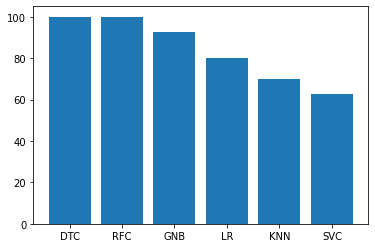

In [416]:
plt.bar(x=result['Model'],height=result['Accuracy'])

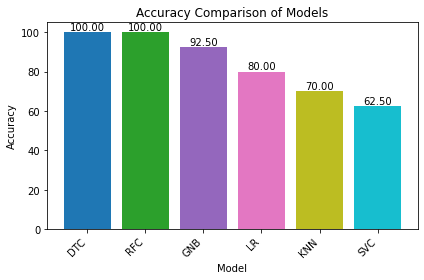

In [429]:
num_models = len(result['Model'])
cmap = plt.cm.tab10  # Choose a colormap (adjust for desired color scheme)
colors = cmap(np.arange(num_models) / (num_models - 1))  # Normalize color values
plt.bar(x=result['Model'],height=result['Accuracy'],color=colors)

for i, v in enumerate(result['Accuracy']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')  # Adjust offset for value placement

# Customize the plot
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing for better visualization


In [443]:
df.sample()

,Age,F,M,BP,Cholesterol,Na_to_K,Drug
102,28,1,0,1,2,13.127,drugC


In [452]:
dtc.predict([[28,1,0,1,2,14]])

array(['drugC'], dtype=object)